In [1]:
import os
from pathlib import Path
import string
import numpy as np
from FlowCytometryTools import ThresholdGate, PolyGate, FCMeasurement
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/dist-packages/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)
/usr/local/lib/python3.7/dist-packages/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)


In [2]:
def importF(date, plate, wellRow, panel, wellNum=None):
    """
    Import FCS files. Variable input: date in format mm-dd, plate #, panel #, and well letter. Output is a list of Data File Names in FCT Format
    Title/file names are returned in the array file --> later referenced in other functions as title/titles input argument
    """
    path_ = os.path.abspath('')
    pathname = path_ + "/data/PBMC-rec-quant/" + date + "/Plate " + plate + "/Plate " + plate + " - Panel " + str(panel) + " IL2R/"

    # Declare arrays and int
    file = []
    sample = []
    z = 0
    # Read in user input for file path and assign to array file
    pathlist = Path(r"" + str(pathname)).glob("**/*.fcs")
    for path in pathlist:
        wellID = path.name.split("_")[1]
        if wellID[0] == wellRow:
            file.append(str(path))
    file.sort()
    assert file != []
    # Go through each file and assign the file contents to entry in the array sample
    for entry in file:
        sample.append(FCMeasurement(ID="Test Sample" + str(z), datafile=entry))
        z += 1
    # The array sample contains data of each file in folder (one file per entry in array)
    channels_ = []
    if panel == 1:
        channels_ = ['BL1-H', 'VL1-H', 'VL6-H', 'VL4-H', 'BL3-H']
    elif panel == 2:
        channels_ = ['BL4-H', 'BL3-H']
    elif panel == 3:
        channels_ = ['VL6-H', 'VL4-H', 'BL3-H']

    if wellNum is None:
        combinedSamples = combineWells(sample, channels_)  # Combines all files from samples and transforms
        return combinedSamples

    tsample = sample[wellNum - 1]

    return tsample.transform('tlog', channels=channels_)


In [3]:
sampleA5 = importF("04-23", "1", "A", 1, 5)
sampleB5 = importF("04-23", "1", "B", 2, 5)
sampleC5 = importF("04-23", "1", "C", 3, 5)
sampleD_A = importF("04-23", "1", "D", 1, 1)
sampleD_B = importF("04-23", "1", "D", 2, 1)
sampleD_C = importF("04-23", "1", "D", 3, 1)

/usr/local/lib/python3.7/dist-packages/FlowCytometryTools/core/transforms.py:80: RuntimeWarning: invalid value encountered in log10
  return where(x <= th, log10(th) * 1. * r / d, log10(x) * 1. * r / d)


In [4]:
def plot_hist(sample, channels, receptors, label, first=0, skip=False):
    ax1, ax2 = np.divmod(np.arange(len(channels)-first), np.full(len(channels)-first, 2))
    fig, axes = plt.subplots(figsize=(18,16), nrows=np.amax(ax1)+1, ncols=2, sharey=True)
    fig.suptitle(label)
    for i, s in enumerate(sample):
        if skip == True:
            if i < first:
                continue

        tform = s.transform('tlog', channels=channels[i])
        data = tform.data[[channels[i]]][0:]
        axes[ax1[i-first],ax2[i-first]].hist(data[channels[i]], bins=100)
        axes[ax1[i-first],ax2[i-first]].title.set_text('BC ' + str(i-first))

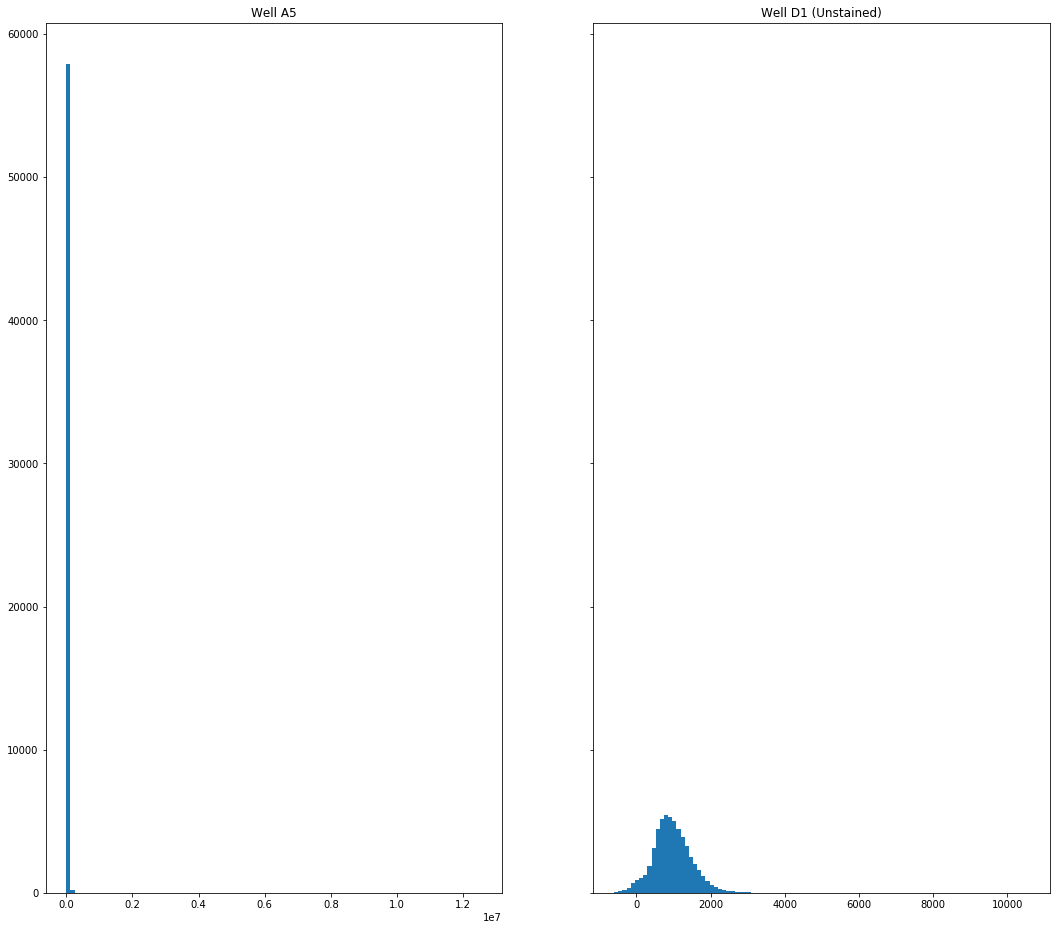

In [5]:
fig, axes = plt.subplots(figsize=(18,16), nrows=1, ncols=2, sharey=True)
axes[0].hist(sampleA5["RL1-H"], bins=100)
axes[0].title.set_text('Well A5')
axes[1].hist(sampleD_A["RL1-H"], bins=100)
axes[1].title.set_text('Well D1 (Unstained)')

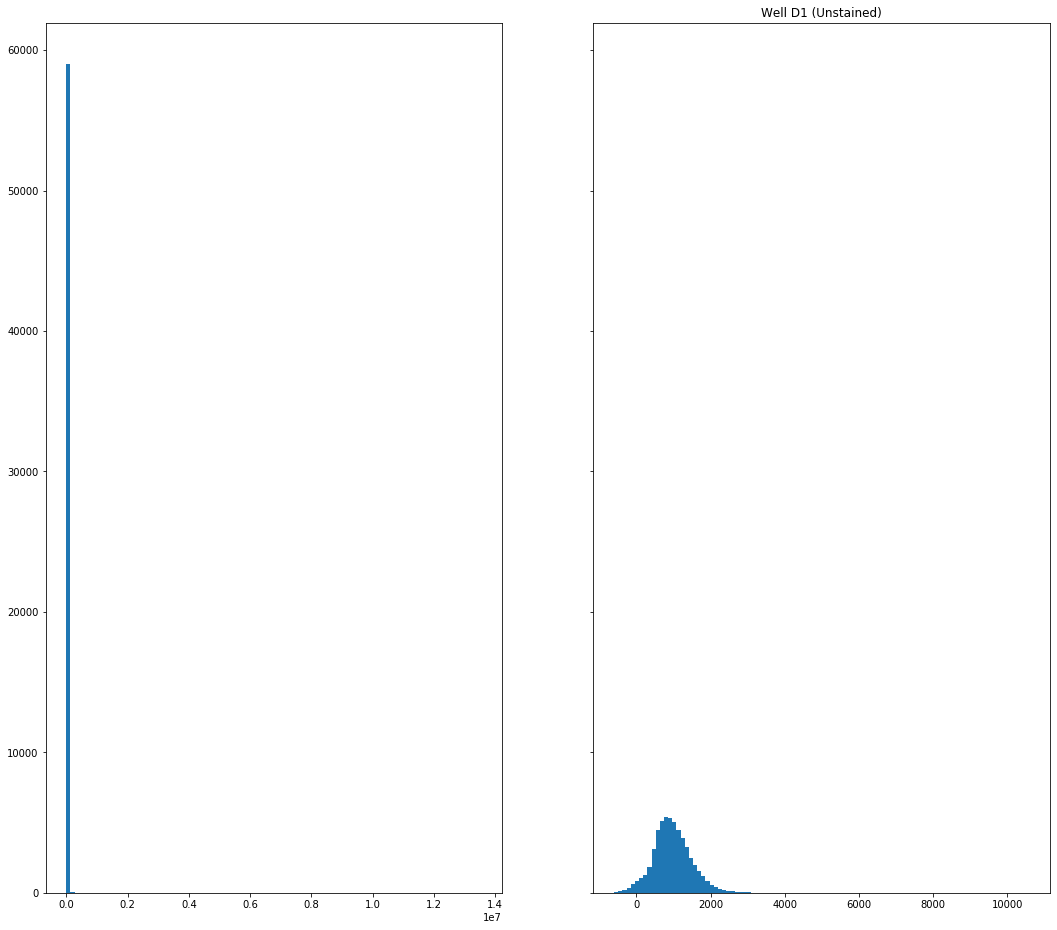

In [6]:
fig, axes = plt.subplots(figsize=(18,16), nrows=1, ncols=2, sharey=True)
axes[0].hist(sampleB5["RL1-H"], bins=100)
axes[1].title.set_text('Well B5')
axes[1].hist(sampleD_B["RL1-H"], bins=100)
axes[1].title.set_text('Well D1 (Unstained)')

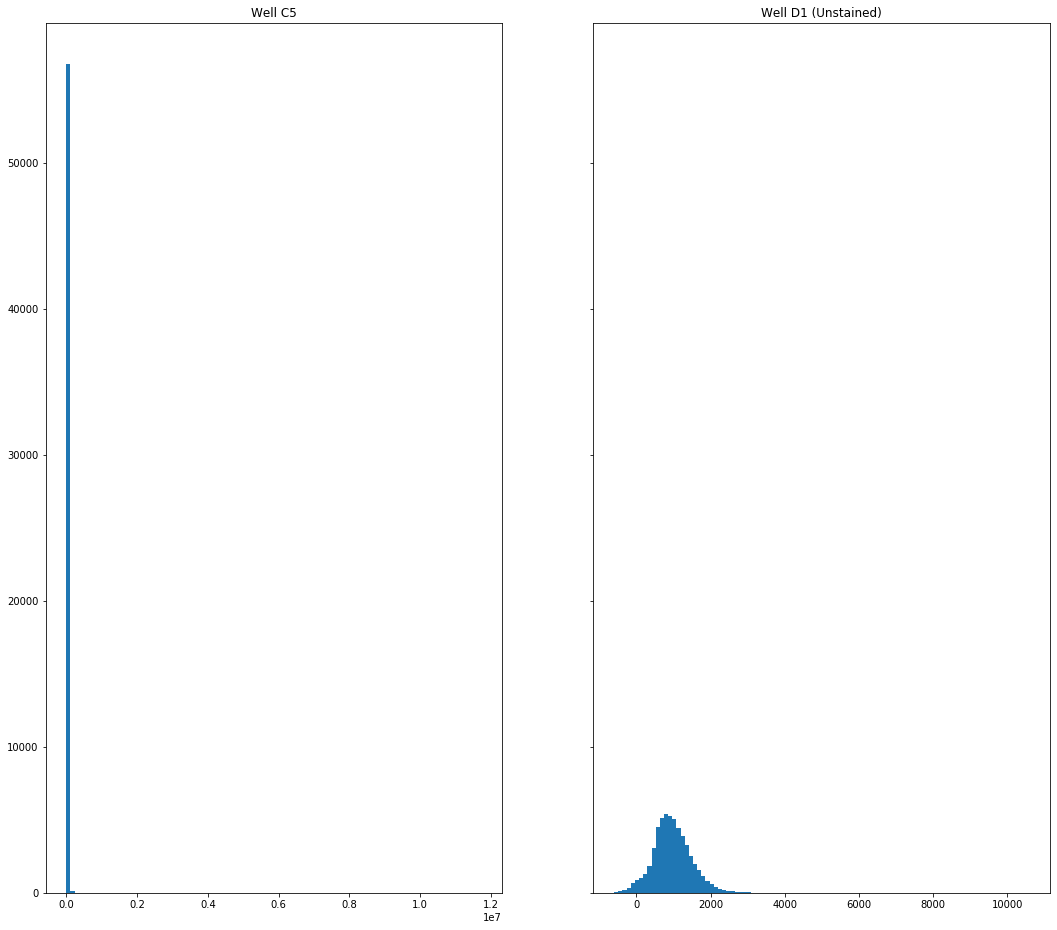

In [7]:
fig, axes = plt.subplots(figsize=(18,16), nrows=1, ncols=2, sharey=True)
axes[0].hist(sampleC5["RL1-H"], bins=100)
axes[0].title.set_text('Well C5')
axes[1].hist(sampleD_C["RL1-H"], bins=100)
axes[1].title.set_text('Well D1 (Unstained)')

In [12]:
data = sampleD_A.get_data()
print(data['RL1-H'].mean())
print(data['RL1-H'].median())

967.7513
934.0
